In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
train = pd.read_csv('data.csv')

In [3]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
train['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [6]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [7]:
train['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [8]:
train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [9]:
train.loc[train['protocol_type']=='tcp', 'protocol_type'] =1
train.loc[train['protocol_type']=='udp', 'protocol_type'] =2
train.loc[train['protocol_type']=='icmp', 'protocol_type']=3

In [10]:
train['protocol_type'] = pd.to_numeric(train['protocol_type'])

In [11]:
train.loc[train['flag']== 'SF', 'flag'] = 1
train.loc[train['flag']== 'S0', 'flag'] = 2
train.loc[train['flag']== 'REJ', 'flag'] = 3
train.loc[train['flag']== 'RSTR', 'flag'] = 4
train.loc[train['flag']== 'SH', 'flag'] = 5
train.loc[train['flag']== 'RSTO', 'flag'] = 6
train.loc[train['flag']== 'S1', 'flag'] = 7
train.loc[train['flag']== 'RSTOS0', 'flag'] = 8
train.loc[train['flag']== 'S3', 'flag'] = 9
train.loc[train['flag']== 'S2', 'flag'] = 10
train.loc[train['flag']== 'OTH', 'flag'] = 11


In [12]:
train['flag'] = pd.to_numeric(train['flag'])

In [13]:
 train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,1,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,other,1,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,private,2,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,http,1,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,http,1,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,exec,6,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,1,ftp_data,1,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,1,private,3,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,1,nnsp,2,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [14]:
train['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [15]:
train.loc[train['class']=='normal', 'class'] =0
train.loc[train['class']=='anomaly', 'class'] =1

In [16]:
train['class'] = pd.to_numeric(train['class'])

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [18]:
train['count'].unique()

array([  2,  13, 123,   5,  30, 121, 166, 117, 270, 133, 205, 199,   3,
       233,  96,   8,   1,   9, 223, 280, 248, 279,  14,  33,  57, 181,
       122,  22, 228,  50, 262,   4,  11, 108,  80,  44, 258,  10,  61,
        26, 120,  73, 135,  24, 148, 206, 175,  63,  52, 125, 168, 145,
       138, 276, 220, 212, 250, 132, 109, 146, 300, 129,  32,  82,  15,
        21, 110,   6,   7, 246, 272, 259, 294,  79, 190, 245, 263,  87,
       292, 295, 143, 278, 102, 251, 222, 260, 511, 287, 486, 286,  35,
        28, 101,  12,  19, 406,  17, 201, 124, 162, 277, 274, 141, 103,
       171, 238, 281, 163, 301,  16,  46,  39, 211, 256, 144, 104,  18,
        74, 225,  66, 139, 241, 213,  36, 254, 179, 195,  20, 208, 268,
       425,  42, 196, 111, 237, 257,  77, 137, 290, 203, 116, 457,  47,
        71, 200, 140,  68, 215, 115, 275,  76, 202, 252, 197, 198, 154,
       204,  25, 459, 253, 142, 167,  43, 221, 224, 284, 150, 255, 235,
       131, 100,  34, 151, 130, 236,  84, 265, 210,  54,  23, 12

In [19]:
X = train[['protocol_type',
 
 'flag','src_bytes',
 'dst_bytes',
 'hot',
 'count',
 'srv_count',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate'
 ]]

y = train['class']

In [20]:
X

,protocol_type,flag,src_bytes,dst_bytes,hot,count,srv_count,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate
0,1,1,491,0,0,2,2,1.00,150,25,0.17,0.03,0.17,0.05
1,2,1,146,0,0,13,1,0.08,255,1,0.00,0.60,0.88,0.00
2,1,2,0,0,0,123,6,0.05,255,26,0.10,0.05,0.00,0.00
3,1,1,232,8153,0,5,5,1.00,30,255,1.00,0.00,0.03,0.00
4,1,1,199,420,0,30,32,1.00,255,255,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,6,0,0,0,100,7,0.07,255,7,0.03,0.06,0.00,1.00
25188,1,1,334,0,0,1,1,1.00,1,39,1.00,0.00,1.00,0.00
25189,1,3,0,0,0,105,7,0.07,255,13,0.05,0.07,0.00,1.00
25190,1,2,0,0,0,129,18,0.14,255,20,0.08,0.06,0.00,0.00


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
y.unique()

array([0, 1], dtype=int64)

In [23]:
from collections import Counter

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                25192 non-null  int64  
 1   flag                         25192 non-null  int64  
 2   src_bytes                    25192 non-null  int64  
 3   dst_bytes                    25192 non-null  int64  
 4   hot                          25192 non-null  int64  
 5   count                        25192 non-null  int64  
 6   srv_count                    25192 non-null  int64  
 7   same_srv_rate                25192 non-null  float64
 8   dst_host_count               25192 non-null  int64  
 9   dst_host_srv_count           25192 non-null  int64  
 10  dst_host_same_srv_rate       25192 non-null  float64
 11  dst_host_diff_srv_rate       25192 non-null  float64
 12  dst_host_same_src_port_rate  25192 non-null  float64
 13  dst_host_rerror_

In [25]:
print('Classes and number of values in trainset after SMOTE:',Counter(y))

Classes and number of values in trainset after SMOTE: Counter({0: 13449, 1: 11743})


In [26]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)

In [27]:

X,y = oversample.fit_resample(X,y)
print('Classes and number of values in trainset after SMOTE:',Counter(y))

Classes and number of values in trainset after SMOTE: Counter({0: 13449, 1: 13449})


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
print(x.shape)
print(x_train.shape)
 
print(y_train.shape)

(26898, 14)
(21518, 14)
(21518,)


In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization,Dropout

In [32]:
model = Sequential()
model.add(Dense(10, input_dim=14, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
337/337 [==============================] - 2s 3ms/step - loss: 0.6200 - accuracy: 0.7330 - val_loss: 0.3170 - val_accuracy: 0.8970
Epoch 2/100
337/337 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8779 - val_loss: 0.3664 - val_accuracy: 0.8909
Epoch 3/100
337/337 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.8988 - val_loss: 0.5225 - val_accuracy: 0.8537
Epoch 4/100
337/337 [==============================] - 1s 2ms/step - loss: 0.2376 - accuracy: 0.9124 - val_loss: 0.4488 - val_accuracy: 0.8851
Epoch 5/100
337/337 [==============================] - 1s 2ms/step - loss: 0.2215 - accuracy: 0.9191 - val_loss: 0.4262 - val_accuracy: 0.8855
Epoch 6/100
337/337 [==============================] - 1s 2ms/step - loss: 0.2075 - accuracy: 0.9242 - val_loss: 0.3777 - val_accuracy: 0.8892
Epoch 7/100
337/337 [==============================] - 1s 2ms/step - loss: 0.2007 - accuracy: 0.9282 - val_loss: 0.3625 - val_accuracy: 0.8941

Epoch 58/100
337/337 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9678 - val_loss: 0.1721 - val_accuracy: 0.9483
Epoch 59/100
337/337 [==============================] - 1s 2ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.1813 - val_accuracy: 0.9517
Epoch 60/100
337/337 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9659 - val_loss: 0.1788 - val_accuracy: 0.9465
Epoch 61/100
337/337 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9631 - val_loss: 0.1762 - val_accuracy: 0.9480
Epoch 62/100
337/337 [==============================] - 1s 2ms/step - loss: 0.1150 - accuracy: 0.9630 - val_loss: 0.1731 - val_accuracy: 0.9509
Epoch 63/100
337/337 [==============================] - 1s 2ms/step - loss: 0.1154 - accuracy: 0.9637 - val_loss: 0.1760 - val_accuracy: 0.9517
Epoch 64/100
337/337 [==============================] - 1s 2ms/step - loss: 0.1144 - accuracy: 0.9631 - val_loss: 0.1773 - val_accuracy:

In [35]:
import pickle

In [36]:
pickle.dump(sc, open('StandardScaler.pk', 'wb'))

In [37]:
sc = pickle.load(open('StandardScaler.pk', 'rb'))

In [38]:
model.save('iot.h5')

In [39]:
y_pred =  model.predict(x_test)

169/169 [==============================] - 0s 1ms/step


In [40]:
import numpy as np
y_pred.shape
y_pred = np.round(y_pred)

In [41]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_pred,y_test))

0.9509293680297398


<AxesSubplot:>

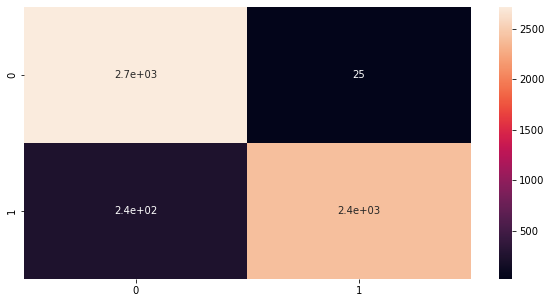

In [42]:
import seaborn as sns
plt.figure(figsize=(10,5))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2738
           1       0.99      0.91      0.95      2642

    accuracy                           0.95      5380
   macro avg       0.95      0.95      0.95      5380
weighted avg       0.95      0.95      0.95      5380

